In [3]:
import numpy as np
from math import exp
from scipy.integrate import ode


def fA(t, x):
    return -30.0 * x

def exactA(t):
    return exp(-30.0 * t)

def rk4_one_step_A(h):
    x0 = 1.0
    k1 = fA(0.0, x0)
    k2 = fA(0.0 + h/2, x0 + h*k1/2)
    k3 = fA(0.0 + h/2, x0 + h*k2/2)
    k4 = fA(0.0 + h,   x0 + h*k3)
    return x0 + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def vode_to_t(method, t_end, dt=1e-3):
    r = ode(lambda t, y: fA(t, y)).set_integrator("vode", method=method)
    r.set_initial_value(1.0, 0.0)
    while r.successful() and r.t < t_end:
        r.integrate(min(r.t + dt, t_end))
    return float(r.y)

hs = [0.2, 0.1, 0.05, 0.02, 0.01]
print("Problem A: x'=-30x, x(0)=1")
for h in hs:
    rk4 = rk4_one_step_A(h)
    ex  = exactA(h)
    ad  = vode_to_t("adams", h, dt=min(1e-3, h/10))
    bd  = vode_to_t("bdf",   h, dt=min(1e-2, h/10))
    print(f"h={h:>5}  RK4={rk4: .8f}  exact={ex: .8f}  adams={ad: .8f}  bdf={bd: .8f}")


Problem A: x'=-30x, x(0)=1
h=  0.2  RK4= 31.00000000  exact= 0.00247875  adams= 0.00247879  bdf= 0.00247879
h=  0.1  RK4= 1.37500000  exact= 0.04978707  adams= 0.04978730  bdf= 0.04978737
h= 0.05  RK4= 0.27343750  exact= 0.22313016  adams= 0.22313052  bdf= 0.22313001
h= 0.02  RK4= 0.54940000  exact= 0.54881164  adams= 0.54881186  bdf= 0.54881168
h= 0.01  RK4= 0.74083750  exact= 0.74081822  adams= 0.74081862  bdf= 0.74081720


/tmp/ipython-input-388/90885747.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(r.y)


In [4]:
import numpy as np
from math import sin, cos, exp
from scipy.integrate import ode

def make_fB(omega):
    def fB(t, x):
        return -20.0*x + 20.0*sin(omega*t) + omega*cos(omega*t)
    return fB

def exactB(t, omega):
    return sin(omega*t) + exp(-20.0*t)

def vodeB_to_t(method, omega, t_end, dt):
    fB = make_fB(omega)
    r = ode(lambda t, y: fB(t, y)).set_integrator("vode", method=method)
    r.set_initial_value(1.0, 0.0)
    while r.successful() and r.t < t_end:
        r.integrate(min(r.t + dt, t_end))
    return float(r.y)

omega_list = [0.02, 0.2, 2.0, 20.0]
t_end = 2.0
for w in omega_list:
    ex = exactB(t_end, w)
    ad = vodeB_to_t("adams", w, t_end, dt=1e-3)
    bd = vodeB_to_t("bdf",   w, t_end, dt=1e-2)
    print(f"omega={w:<6} exact={ex: .8f} adams={ad: .8f} bdf={bd: .8f}")


omega=0.02   exact= 0.03998933 adams= 0.03998931 bdf= 0.03998934
omega=0.2    exact= 0.38941834 adams= 0.38941875 bdf= 0.38941814
omega=2.0    exact=-0.75680250 adams=-0.75680210 bdf=-0.75680240
omega=20.0   exact= 0.74511316 adams= 0.74511226 bdf= 0.74510902


/tmp/ipython-input-388/1858701163.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(r.y)


Problem A: x'=-30x, x(0)=1
h= 0.01  RK4= 0.74083750  exact= 0.74081822  adams= 0.74081862  bdf= 0.74081720
h= 0.02  RK4= 0.54940000  exact= 0.54881164  adams= 0.54881186  bdf= 0.54881168
h= 0.05  RK4= 0.27343750  exact= 0.22313016  adams= 0.22313052  bdf= 0.22313001
h=  0.1  RK4= 1.37500000  exact= 0.04978707  adams= 0.04978730  bdf= 0.04978737
h=  0.2  RK4= 31.00000000  exact= 0.00247875  adams= 0.00247879  bdf= 0.00247879


/tmp/ipython-input-388/3194502199.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(r.y)


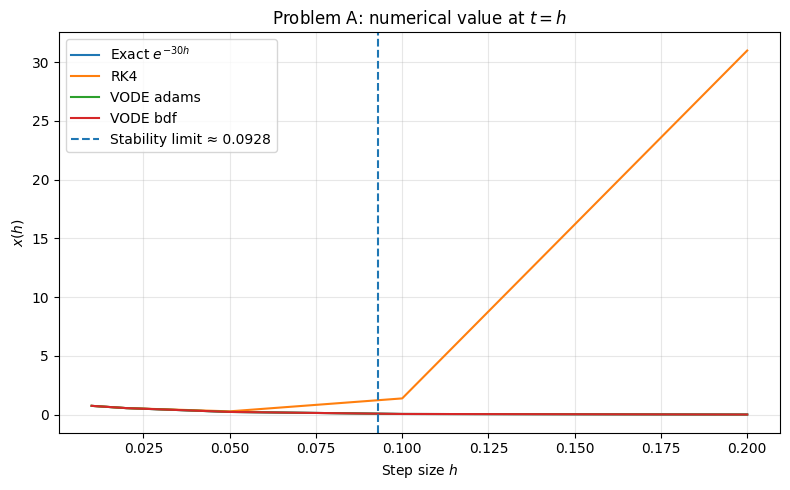

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.integrate import ode

def fA(t, x):
    return -30.0 * x

def exactA(t):
    return exp(-30.0 * t)

def rk4_one_step_A(h):
    x0 = 1.0
    k1 = fA(0.0, x0)
    k2 = fA(0.0 + h/2, x0 + h*k1/2)
    k3 = fA(0.0 + h/2, x0 + h*k2/2)
    k4 = fA(0.0 + h,   x0 + h*k3)
    return x0 + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def vode_to_t(method, t_end, dt=1e-3):
    r = ode(lambda t, y: fA(t, y)).set_integrator("vode", method=method)
    r.set_initial_value(1.0, 0.0)
    while r.successful() and r.t < t_end:
        r.integrate(min(r.t + dt, t_end))
    return float(r.y)

hs = [0.01, 0.02, 0.05, 0.1, 0.2]


rk4_vals = []
exact_vals = []
adams_vals = []
bdf_vals = []

print("Problem A: x'=-30x, x(0)=1")
for h in hs:
    rk4 = rk4_one_step_A(h)
    ex  = exactA(h)
    ad  = vode_to_t("adams", h, dt=min(1e-3, h/10))
    bd  = vode_to_t("bdf",   h, dt=min(1e-2, h/10))

    rk4_vals.append(rk4)
    exact_vals.append(ex)
    adams_vals.append(ad)
    bdf_vals.append(bd)

    print(f"h={h:>5}  RK4={rk4: .8f}  exact={ex: .8f}  adams={ad: .8f}  bdf={bd: .8f}")


hcrit = 2.7853 / 30.0

plt.figure(figsize=(8,5))
plt.plot(hs, exact_vals, label="Exact $e^{-30h}$")
plt.plot(hs, rk4_vals, label="RK4")
plt.plot(hs, adams_vals, label="VODE adams")
plt.plot(hs, bdf_vals, label="VODE bdf")

plt.axvline(hcrit, linestyle="--", label=f"Stability limit ≈ {hcrit:.4f}")

plt.xlabel("Step size $h$")
plt.ylabel("$x(h)$")
plt.title("Problem A: numerical value at $t=h$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()


plt.savefig("ProblemA_stability_plot.pdf", format="pdf", dpi=1000)

plt.show()

Problem A: x'=-30x, x(0)=1
h= 0.01  RK4= 0.74083750  exact= 0.74081822  adams= 0.74081862  bdf= 0.74081720
h= 0.02  RK4= 0.54940000  exact= 0.54881164  adams= 0.54881186  bdf= 0.54881168
h= 0.05  RK4= 0.27343750  exact= 0.22313016  adams= 0.22313052  bdf= 0.22313001
h=  0.1  RK4= 1.37500000  exact= 0.04978707  adams= 0.04978730  bdf= 0.04978737
h=  0.2  RK4= 31.00000000  exact= 0.00247875  adams= 0.00247879  bdf= 0.00247879


/tmp/ipython-input-388/3369213229.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(r.y)


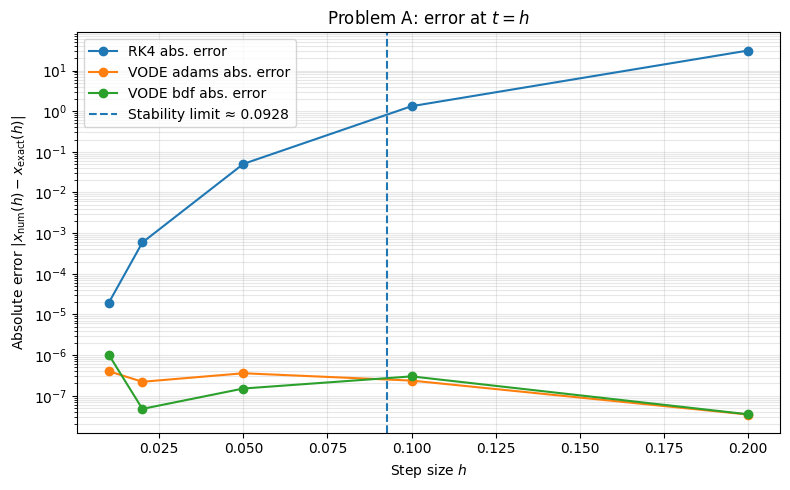

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.integrate import ode


def fA(t, x):
    return -30.0 * x

def exactA(t):
    return exp(-30.0 * t)

def rk4_one_step_A(h):
    x0 = 1.0
    k1 = fA(0.0, x0)
    k2 = fA(0.0 + h/2.0, x0 + h*k1/2.0)
    k3 = fA(0.0 + h/2.0, x0 + h*k2/2.0)
    k4 = fA(0.0 + h,     x0 + h*k3)
    return x0 + (h/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)

def vode_to_t(method, t_end, dt=1e-3):
    r = ode(lambda t, y: fA(t, y)).set_integrator("vode", method=method)
    r.set_initial_value(1.0, 0.0)
    while r.successful() and r.t < t_end:
        r.integrate(min(r.t + dt, t_end))
    return float(r.y)


hs = [0.01, 0.02, 0.05, 0.1, 0.2]

rk4_vals = []
exact_vals = []
adams_vals = []
bdf_vals = []

print("Problem A: x'=-30x, x(0)=1")
for h in hs:
    rk4 = rk4_one_step_A(h)
    ex  = exactA(h)
    ad  = vode_to_t("adams", h, dt=min(1e-3, h/10.0))
    bd  = vode_to_t("bdf",   h, dt=min(1e-2, h/10.0))

    rk4_vals.append(rk4)
    exact_vals.append(ex)
    adams_vals.append(ad)
    bdf_vals.append(bd)

    print(f"h={h:>5}  RK4={rk4: .8f}  exact={ex: .8f}  adams={ad: .8f}  bdf={bd: .8f}")


hcrit = 2.7853 / 30.0

hs_arr    = np.array(hs, dtype=float)
exact_arr = np.array(exact_vals, dtype=float)
rk4_arr   = np.array(rk4_vals, dtype=float)
adams_arr = np.array(adams_vals, dtype=float)
bdf_arr   = np.array(bdf_vals, dtype=float)

rk4_err   = np.abs(rk4_arr   - exact_arr)
adams_err = np.abs(adams_arr - exact_arr)
bdf_err   = np.abs(bdf_arr   - exact_arr)

plt.figure(figsize=(8, 5))
plt.semilogy(hs_arr, rk4_err,   marker="o", label="RK4 abs. error")
plt.semilogy(hs_arr, adams_err, marker="o", label="VODE adams abs. error")
plt.semilogy(hs_arr, bdf_err,   marker="o", label="VODE bdf abs. error")

plt.axvline(hcrit, linestyle="--", label=f"Stability limit ≈ {hcrit:.4f}")

plt.xlabel("Step size $h$")
plt.ylabel(r"Absolute error $|x_{\mathrm{num}}(h)-x_{\mathrm{exact}}(h)|$")
plt.title("Problem A: error at $t=h$")
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()

plt.savefig("ProblemA_error_plot.pdf", format="pdf", dpi=1000)

plt.show()

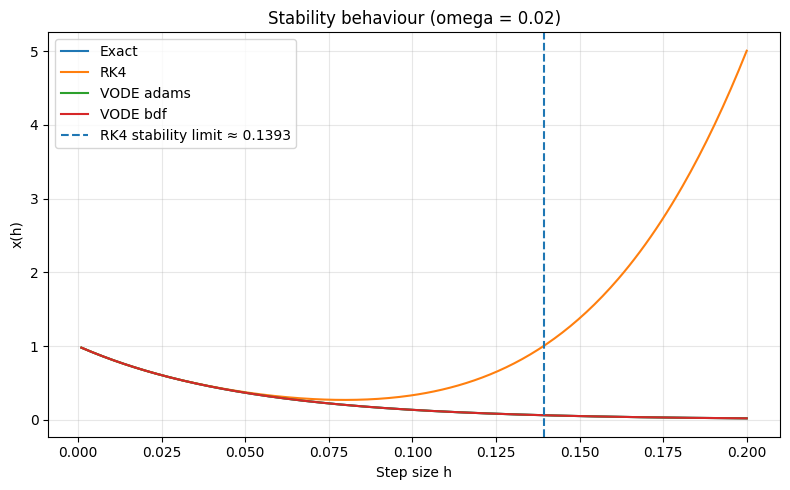

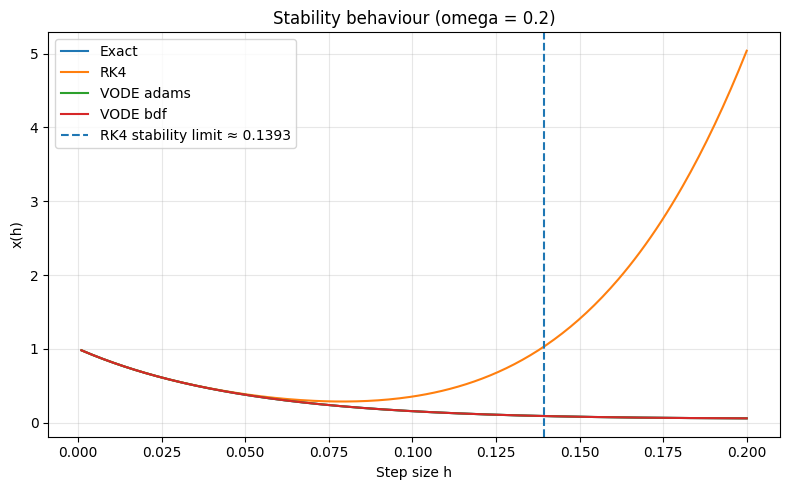

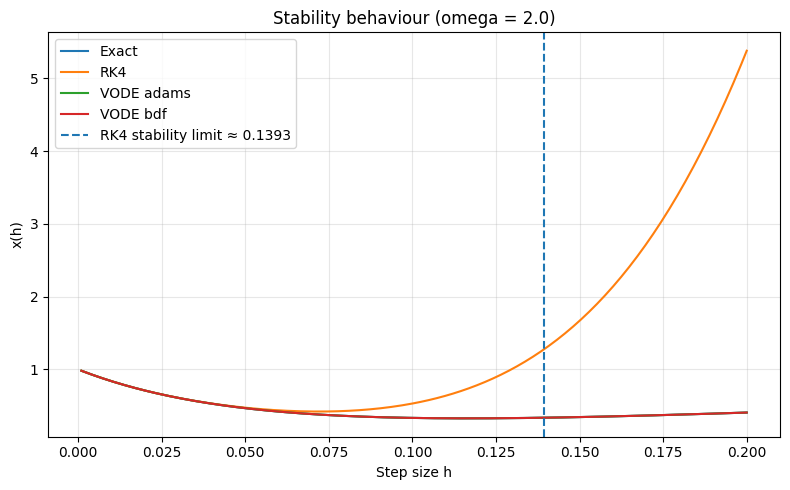

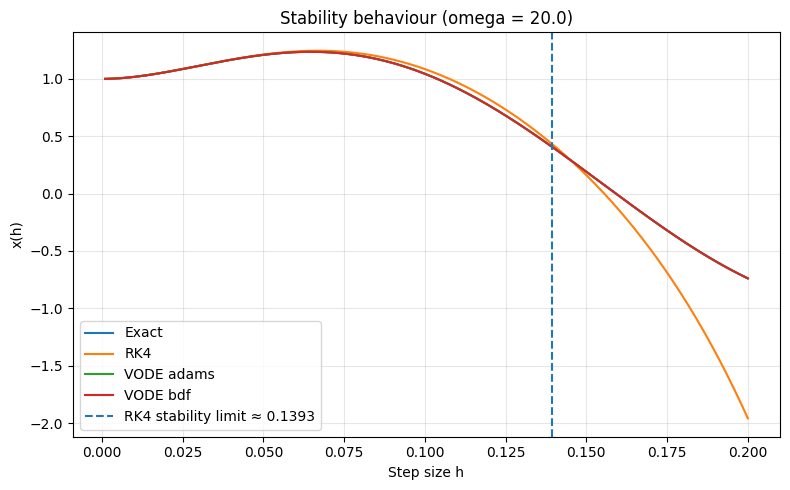

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos
from scipy.integrate import ode

def make_fB(omega):
    def fB(t, x):
        return -20.0*x + 20.0*sin(omega*t) + omega*cos(omega*t)
    return fB

def exactB_one_step(h, omega):
    return np.exp(-20.0*h) + np.sin(omega*h)

def rk4_one_step_B(h, omega):
    fB = make_fB(omega)
    x0, t0 = 1.0, 0.0
    k1 = fB(t0, x0)
    k2 = fB(t0 + h/2, x0 + h*k1/2)
    k3 = fB(t0 + h/2, x0 + h*k2/2)
    k4 = fB(t0 + h,   x0 + h*k3)
    return x0 + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def vode_to_h(method, omega, h, dt=None):
    fB = make_fB(omega)
    solver = ode(lambda t, y: fB(t, y)).set_integrator("vode", method=method)
    solver.set_initial_value(1.0, 0.0)

    if dt is None:
        dt = min(1e-3, h/10)

    while solver.successful() and solver.t < h:
        solver.integrate(min(solver.t + dt, h))
    return float(solver.y[0])

hcrit2 = 2.7853 / 20.0
omega_list = [0.02, 0.2, 2.0, 20.0]
hs = np.linspace(0.001, 0.20, 250)

for omega in omega_list:
    rk4_vals   = np.array([rk4_one_step_B(h, omega) for h in hs])
    exact_vals = exactB_one_step(hs, omega)
    adams_vals = np.array([vode_to_h("adams", omega, h) for h in hs])
    bdf_vals   = np.array([vode_to_h("bdf",   omega, h) for h in hs])

    plt.figure(figsize=(8, 5))
    plt.plot(hs, exact_vals, label="Exact")
    plt.plot(hs, rk4_vals,   label="RK4")
    plt.plot(hs, adams_vals, label="VODE adams")
    plt.plot(hs, bdf_vals,   label="VODE bdf")
    plt.axvline(hcrit2, linestyle="--", label=f"RK4 stability limit ≈ {hcrit2:.4f}")

    plt.xlabel("Step size h")
    plt.ylabel("x(h)")
    plt.title(f"Stability behaviour (omega = {omega})")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()

    # -------- SAVE AS 1000 DPI PDF --------
    filename = f"stability_plot_omega_{omega}.pdf"
    plt.savefig(filename, format="pdf", dpi=1000)

    plt.show()

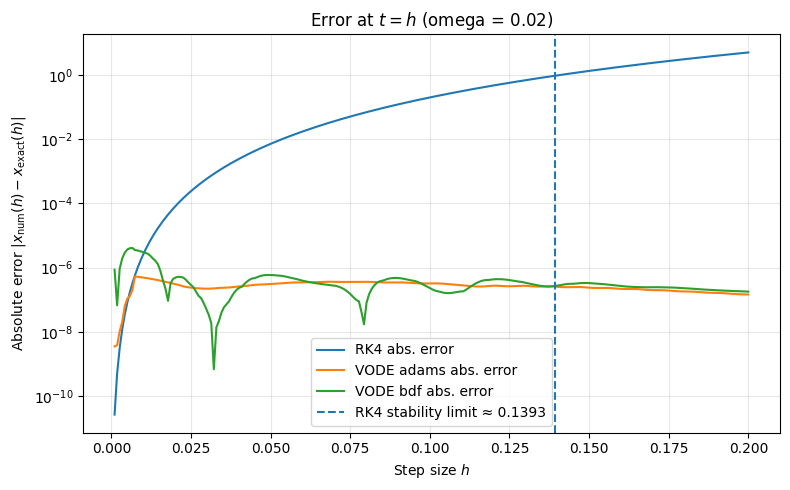

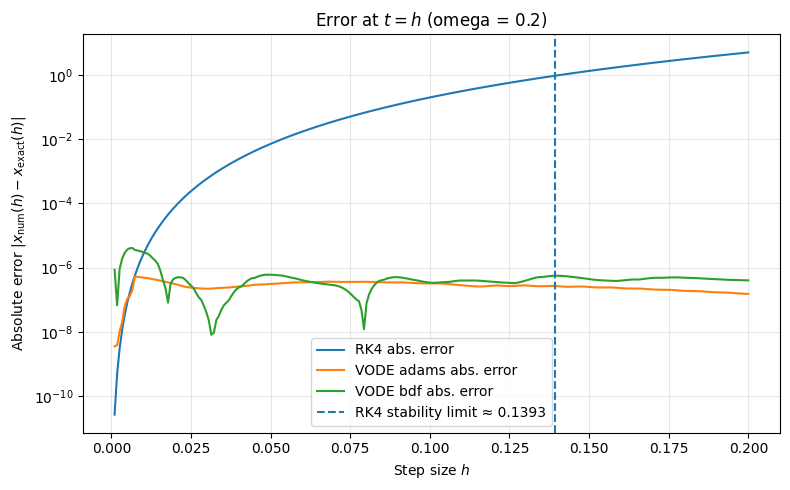

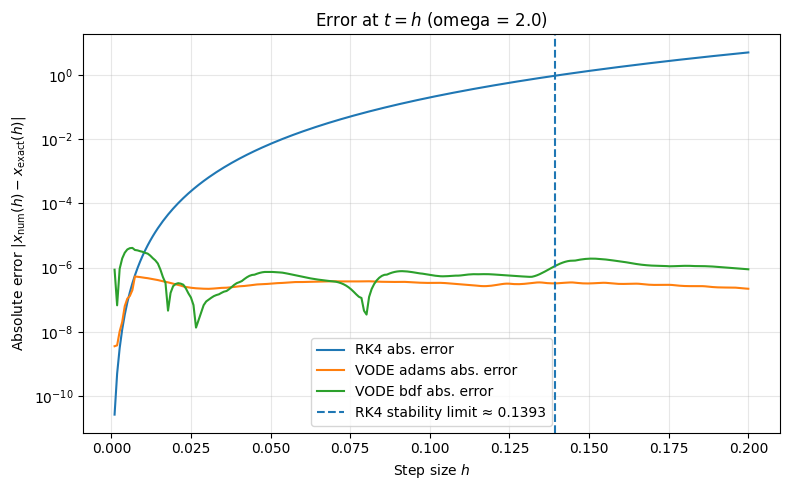

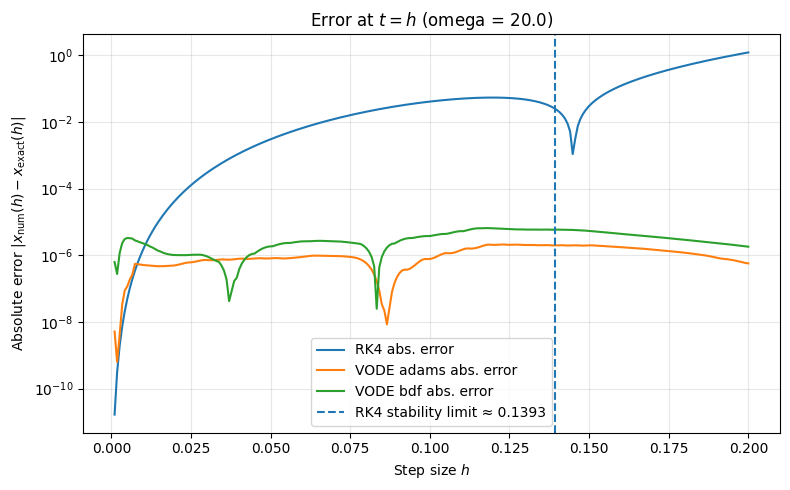

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos
from scipy.integrate import ode

def make_fB(omega):
    def fB(t, x):
        return -20.0*x + 20.0*sin(omega*t) + omega*cos(omega*t)
    return fB

def exactB_one_step(h, omega):

    return np.exp(-20.0*h) + np.sin(omega*h)

def rk4_one_step_B(h, omega):
    fB = make_fB(omega)
    x0, t0 = 1.0, 0.0
    k1 = fB(t0, x0)
    k2 = fB(t0 + h/2.0, x0 + h*k1/2.0)
    k3 = fB(t0 + h/2.0, x0 + h*k2/2.0)
    k4 = fB(t0 + h,     x0 + h*k3)
    return x0 + (h/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)

def vode_to_h(method, omega, h, dt=None):
    fB = make_fB(omega)
    solver = ode(lambda t, y: fB(t, y)).set_integrator("vode", method=method)
    solver.set_initial_value(1.0, 0.0)

    if dt is None:
        dt = min(1e-3, h/10.0)

    while solver.successful() and solver.t < h:
        solver.integrate(min(solver.t + dt, h))
    return float(solver.y[0])


hcrit2 = 2.7853 / 20.0

omega_list = [0.02, 0.2, 2.0, 20.0]
hs = np.linspace(0.001, 0.20, 250)

for omega in omega_list:
    rk4_vals   = np.array([rk4_one_step_B(h, omega) for h in hs])
    exact_vals = exactB_one_step(hs, omega)
    adams_vals = np.array([vode_to_h("adams", omega, h) for h in hs])
    bdf_vals   = np.array([vode_to_h("bdf",   omega, h) for h in hs])


    rk4_err   = np.abs(rk4_vals   - exact_vals)
    adams_err = np.abs(adams_vals - exact_vals)
    bdf_err   = np.abs(bdf_vals   - exact_vals)

    plt.figure(figsize=(8, 5))
    plt.semilogy(hs, rk4_err,   label="RK4 abs. error")
    plt.semilogy(hs, adams_err, label="VODE adams abs. error")
    plt.semilogy(hs, bdf_err,   label="VODE bdf abs. error")
    plt.axvline(hcrit2, linestyle="--", label=f"RK4 stability limit ≈ {hcrit2:.4f}")

    plt.xlabel("Step size $h$")
    plt.ylabel(r"Absolute error $|x_{\mathrm{num}}(h)-x_{\mathrm{exact}}(h)|$")
    plt.title(f"Error at $t=h$ (omega = {omega})")
    plt.grid(True, which="both", alpha=0.3)
    plt.legend()
    plt.tight_layout()


    filename = f"error_plot_omega_{omega}.pdf"
    plt.savefig(filename, format="pdf", dpi=1000)

    plt.show()

In [10]:
import numpy as np
from math import sin, cos
from scipy.integrate import ode


def rhs_factory(omega: float):
    def rhs(t, y):
        x = float(y[0])
        return [-20.0 * x + 20.0 * sin(omega * t) + omega * cos(omega * t)]
    return rhs

def exact_x(t: float, omega: float) -> float:
    return float(np.exp(-20.0 * t) + np.sin(omega * t))

def get_vode_stats(solver):

    integ = solver._integrator


    nst = getattr(integ, "nst", None)
    nfe = getattr(integ, "nfe", None)
    if nst is not None and nfe is not None:
        return int(nst), int(nfe)


    iwork = getattr(integ, "iwork", None)
    if iwork is not None and len(iwork) >= 12:
        return int(iwork[10]), int(iwork[11])

    return None, None

def run_vode(method: str, omega: float, t_end: float, rtol=1e-8, atol=1e-10):
    rhs = rhs_factory(omega)
    solver = ode(rhs).set_integrator(
        "vode",
        method=method,
        rtol=rtol,
        atol=atol,
        nsteps=200000
    )
    solver.set_initial_value([1.0], 0.0)
    solver.integrate(t_end)

    x_num = float(solver.y[0])
    err = abs(x_num - exact_x(t_end, omega))
    nst, nfe = get_vode_stats(solver)
    return nst, nfe, err


t_end = 10.0
omega_list = [0.02, 1.00, 20.00]
methods = ["adams", "bdf"]

rows = []
for omega in omega_list:
    for method in methods:
        nst, nfe, err = run_vode(method, omega, t_end)
        rows.append((omega, method, nst, nfe, err))

header = f"{'omega':>7}  {'method':>6}  {'nst':>6}  {'nfe':>6}  {'Abs. error':>11}"
print(header)
print("-" * len(header))
for omega, method, nst, nfe, err in rows:
    nst_str = "?" if nst is None else str(nst)
    nfe_str = "?" if nfe is None else str(nfe)
    print(f"{omega:7.2f}  {method:>6}  {nst_str:>6}  {nfe_str:>6}  {err:11.2e}")

  omega  method     nst     nfe   Abs. error
--------------------------------------------
   0.02   adams     508     954     6.06e-10
   0.02     bdf     540     952     2.34e-10
   1.00   adams     523     902     8.20e-09
   1.00     bdf     482     848     1.62e-09
  20.00   adams    2413    4056     9.49e-09
  20.00     bdf    3633    6879     1.88e-07
